# Demonstration of added utility depending on time to IVT and MT

In this notebook we examine the relationship between time to treatment and the effect of treatment.

Outcome results are calculated for three patients groups:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

When we look at combined effect of these groups, we make some basic assumptions (which are used as being 'reasonable' rather than 'definitive'):

* 20% of all ischaemic stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).


## Load packages

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
from outcome_utilities.clinical_outcome import Clinical_outcome

import warnings
warnings.filterwarnings("ignore")

## Load mRS distributions

In [2]:
mrs_dists = pd.read_csv(
    './outcome_utilities/mrs_dist_probs_cumsum.csv', index_col='Stroke type')

## Define plotting function

In [3]:
def plot_results(results, time_to_ivt, time_to_mt,
                 title=' ', filename='test', contours=0,
                 aspect='auto', figsize=(6,5)):
    
    time_step_ivt = time_to_ivt[1] - time_to_ivt[0]
    time_step_mt  = time_to_mt[1]  - time_to_mt[0]
    extent = [time_to_ivt[0]  - time_step_ivt*0.5, 
              time_to_ivt[-1] + time_step_ivt*0.5, 
              time_to_mt[0]   - time_step_mt *0.5,  
              time_to_mt[-1]  + time_step_mt *0.5]

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot()
    
    if contours==1:
        img = ax.contour(results, 
                    cmap=cm.gnuplot,
                    vmin=0,
                    extent=extent,
                    aspect=aspect)
    else:
        img = ax.imshow(results, interpolation='nearest', origin='lower',
                    cmap=cm.gnuplot,
                    vmin=0,
                    extent=extent,
                    aspect=aspect)
    
    
    ax.set_xlabel('Time to IVT (mins) if applicable')
    ax.set_ylabel('Time to MT (mins) if applicable')
    ax.set_xticks(np.arange(0, max_time_to_ivt + 1, 30))
    ax.set_yticks(np.arange(0, max_time_to_mt + 1, 60))
    fig.colorbar(img, label='Mean population added utility')
    ax.set_title(title)
    #plt.savefig(f'./images/{filename}.jpg', dpi=300)
    #plt.show()

## Set up model

In [4]:
# Set up outcome model
outcome_model = Clinical_outcome(mrs_dists)

## Individial treatment effects

Here we consider the impact, and effect of time to treatment, for three cohorts independently:

1. nLVO receiving IVT
2. LVO receiving IVT only
3. LVO receiving MT (data based on trails where 85% had also received IVT)

In [5]:
##### nlvo IVT #####

# Set up variables
prop_lvo = 0.0; prop_nlvo = 1.0
prop_lvo_treated_ivt_only = 0
prop_lvo_treated_ivt_mt = 1
prop_nlvo_treated_ivt_only = 1
max_time_to_ivt = 6.3 * 60
max_time_to_mt = 480

times_ivt = np.linspace(0, max_time_to_ivt, 21)
time_to_mt = 480

# Get results
added_utility_nlvo_ivt = []
mean_mrs_nlvo_ivt = []
mrs_less_equal_2_nlvo_ivt = []

for ivt in times_ivt:
    outcomes = outcome_model.calculate_outcomes(
        ivt, time_to_mt, patients=10000, random_spacing=False)
    added_utility_nlvo_ivt.append(outcomes['nlvo_ivt_added_utility'])
    mean_mrs_nlvo_ivt.append(outcomes['nlvo_ivt_mean_mRS'])
    mrs_less_equal_2_nlvo_ivt.append(outcomes['nlvo_ivt_cum_probs'][2])


##### LVO IVT #####

# Set up variables
prop_lvo = 1.0; prop_nlvo = 0.0
prop_lvo_treated_ivt_only = 0
prop_lvo_treated_ivt_mt = 0
prop_nlvo_treated_ivt_only = 0
max_time_to_ivt = 6.3 * 60
max_time_to_mt = 480

times_ivt = np.linspace(0, max_time_to_ivt, 21)
time_to_mt = 480

# Get results
added_utility_lvo_ivt = []
mean_mrs_lvo_ivt = []
mrs_less_equal_2_lvo_ivt = []

for ivt in times_ivt:
    outcomes = outcome_model.calculate_outcomes(ivt, time_to_mt)
    added_utility_lvo_ivt.append(outcomes['lvo_ivt_added_utility'])
    mean_mrs_lvo_ivt.append(outcomes['lvo_ivt_mean_mRS'])
    mrs_less_equal_2_lvo_ivt.append(outcomes['lvo_ivt_cum_probs'][2])

##### LVO MT #####

# Set up variables
prop_lvo = 1.0; prop_nlvo = 0.0
prop_lvo_treated_ivt_only = 0
prop_lvo_treated_ivt_mt = 1
prop_nlvo_treated_ivt_only = 0
max_time_to_ivt = 6.3 * 60
max_time_to_mt = 480

times_mt = np.linspace(0, max_time_to_mt, 21)
time_to_ivt = 6/3 * 60

# Get results
added_utility_lvo_mt = []
mean_mrs_lvo_mt = []
mrs_less_equal_2_lvo_mt = []

for mt in times_mt:
    outcomes = outcome_model.calculate_outcomes(time_to_ivt, mt)
    added_utility_lvo_mt.append(outcomes['lvo_mt_added_utility'])
    mean_mrs_lvo_mt.append(outcomes['lvo_mt_mean_mRS'])
    mrs_less_equal_2_lvo_mt.append(outcomes['lvo_mt_cum_probs'][2])

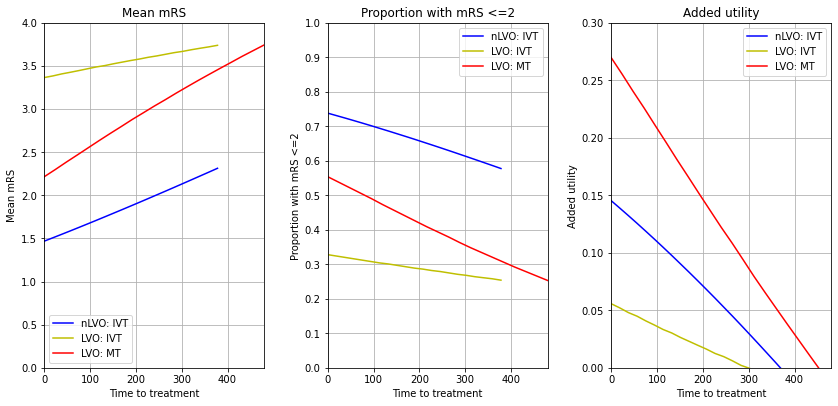

In [6]:
# Plot
fig = plt.figure(figsize=(12,6))

# Mean mRS
ax1 = fig.add_subplot(131)
ax1.plot(times_ivt, mean_mrs_nlvo_ivt, c='b', label='nLVO: IVT')
ax1.plot(times_ivt, mean_mrs_lvo_ivt, c='y', label='LVO: IVT')
ax1.plot(times_mt, mean_mrs_lvo_mt, c='r', label='LVO: MT')
ax1.set_xlim(0, max_time_to_mt)
ax1.set_ylim(0, 4)
ax1.set_xlabel('Time to treatment')
ax1.set_ylabel('Mean mRS')
ax1.set_title('Mean mRS')
ax1.legend()
ax1.grid()

# mRS <= 2
ax2 = fig.add_subplot(132)
ax2.plot(times_ivt, mrs_less_equal_2_nlvo_ivt, c='b', label='nLVO: IVT')
ax2.plot(times_ivt, mrs_less_equal_2_lvo_ivt, c='y', label='LVO: IVT')
ax2.plot(times_mt, mrs_less_equal_2_lvo_mt, c='r', label='LVO: MT')
ax2.set_xlim(0, max_time_to_mt)
ax2.set_ylim(0, 1)
ax2.set_yticks(np.arange(0, 1.01, 0.1))
ax2.set_xlabel('Time to treatment')
ax2.set_ylabel('Proportion with mRS <=2')
ax2.set_title('Proportion with mRS <=2')
ax2.legend()
ax2.grid()

# Added utility
ax3 = fig.add_subplot(133)
ax3.plot(times_ivt, added_utility_nlvo_ivt, c='b', label='nLVO: IVT')
ax3.plot(times_ivt, added_utility_lvo_ivt, c='y', label='LVO: IVT')
ax3.plot(times_mt, added_utility_lvo_mt, c='r', label='LVO: MT')
ax3.set_xlim(0, max_time_to_mt)
ax3.set_ylim(0)
ax3.set_yticks(np.arange(0, 0.31, 0.05))
ax3.set_xlabel('Time to treatment')
ax3.set_ylabel('Added utility')
ax3.set_title('Added utility')
ax3.legend()
ax3.grid()

plt.tight_layout(pad=2)
plt.savefig('./images/time_to_treatment.jpg', dpi=300)

plt.show()

## Combining patient groups

Here we examined the combined effect of IVT and MT on outcomes across nLVO and LVO ischaemic strokes.

In this example, we make some basic assumptions:

* 20% of all stroke admissions receive IVT and/or MT.
* 35% of our treated population have LVO.
* 28.6% of LVO receive MT (this gives 10% of all ischaemic strokes receiving MT)
* 85% of LVO receiving MT have received IVT (from clinical trials  data); for those 85% if the benefit of IVT exceed the benefit of MT (e.g. very early IVT, and very late MT), then the benefit is based on IVT.
* 15.5% nLVO receive thrombolysis (this brings total IVT to 20% use).

In [7]:
prop_lvo = 0.35
prop_nlvo = 1 - prop_lvo
proportion_of_lvo_mt_also_receiving_IVT = 0.85

prop_lvo_treated_ivt_only = 0
prop_lvo_treated_ivt_mt = 0.286 # 0.286 gives 10% final MT if 35% LVO
prop_nlvo_treated_ivt_only = 0.155 # 0.155 gives final 20% IVT

treated_population = (
    prop_nlvo * prop_nlvo_treated_ivt_only +
    prop_lvo * prop_lvo_treated_ivt_mt +
    prop_lvo * prop_lvo_treated_ivt_only
    )

print ('Proportion all admissions treated: ', \
     f'{treated_population:0.3f}')
print ('Proportion LVO admissions treated with MT: ', \
    f'{prop_lvo_treated_ivt_mt:0.3f}')
print ('Proportion LVO admissions treated with IVT only: ' \
    f'{prop_lvo_treated_ivt_only:0.3f}')
print ('Proportion nLVO admissions treated with IVT: ' \
    f'{prop_nlvo_treated_ivt_only:0.3f}')
print ('Proportion LVO MT also receiving IVT: ' \
    f'{proportion_of_lvo_mt_also_receiving_IVT:0.3f}')

max_time_to_ivt = 270
max_time_to_mt = 480


time_to_ivt = np.arange(0, max_time_to_ivt + 1, 10)
time_to_mt = np.arange(0, max_time_to_mt + 1, 10)
results = np.empty(shape=(len(time_to_mt), len(time_to_ivt)))


for x, ivt in enumerate(time_to_ivt):
    for y, mt in enumerate(time_to_mt):
        outcomes = outcome_model.calculate_outcomes(
            ivt, mt, patients=10000, random_spacing=False)
        added_utility_lvo_ivt = outcomes['lvo_ivt_added_utility']
        added_utility_lvo_mt = outcomes['lvo_mt_added_utility']
        added_utility_nlvo_ivt = outcomes['nlvo_ivt_added_utility']

        # If LVO-IVT is greater utility than LVO-MT then adjust MT for 
        # proportion of patients receiving IVT
        if added_utility_lvo_ivt > added_utility_lvo_mt:
            diff = added_utility_lvo_ivt - added_utility_lvo_mt
            added_utility_lvo_mt += \
                diff * proportion_of_lvo_mt_also_receiving_IVT

        added_utility = (
            (added_utility_lvo_mt * prop_lvo * prop_lvo_treated_ivt_mt) +
            (added_utility_lvo_ivt * prop_lvo * prop_lvo_treated_ivt_only) +
            (added_utility_nlvo_ivt * prop_nlvo * prop_nlvo_treated_ivt_only)
                        )
        results[y,x] = added_utility

# Adjust outcome for just treated population
results = results / treated_population

Proportion all admissions treated:  0.201
Proportion LVO admissions treated with MT:  0.286
Proportion LVO admissions treated with IVT only: 0.000
Proportion nLVO admissions treated with IVT: 0.155
Proportion LVO MT also receiving IVT: 0.850


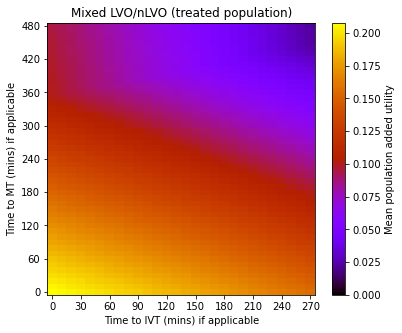

In [8]:
plot_results(results, time_to_ivt, time_to_mt,
             'Mixed LVO/nLVO (treated population)', 'utility_all')
plt.show()

### Same graph with contours:

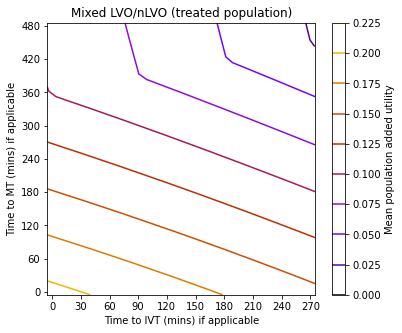

In [9]:
plot_results(results, time_to_ivt, time_to_mt, 
             'Mixed LVO/nLVO (treated population)', 'utility_all',
             contours=1)
plt.show()

### Same graph, different time axes:

In [10]:
time_to_ivt = np.arange(0, max_time_to_ivt+15, 15)
time_to_mt  = np.arange(0, max_time_to_mt+15,  15)
results = np.empty(shape=(len(time_to_mt), len(time_to_ivt)))

for x, ivt in enumerate(time_to_ivt):
    for y, mt in enumerate(time_to_mt):
        outcomes = outcome_model.calculate_outcomes(ivt, mt)
        added_utility_lvo_ivt = outcomes['lvo_ivt_added_utility']
        added_utility_lvo_mt = outcomes['lvo_mt_added_utility']
        added_utility_nlvo_ivt = outcomes['nlvo_ivt_added_utility']

        # If LVO-IVT is greater utility than LVO-MT then adjust MT for 
        # proportion of patients receiving IVT
        if added_utility_lvo_ivt > added_utility_lvo_mt:
            diff = added_utility_lvo_ivt - added_utility_lvo_mt
            added_utility_lvo_mt += \
                diff * proportion_of_lvo_mt_also_receiving_IVT

        added_utility = (
            (added_utility_lvo_mt * prop_lvo * prop_lvo_treated_ivt_mt) +
            (added_utility_lvo_ivt * prop_lvo * prop_lvo_treated_ivt_only) +
            (added_utility_nlvo_ivt * prop_nlvo * prop_nlvo_treated_ivt_only)
                        )
        results[y,x] = added_utility

# Adjust outcome for just treated population
results = results / treated_population

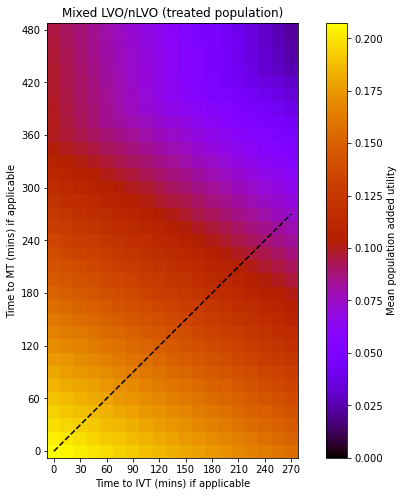

In [11]:
plot_results(results, time_to_ivt, time_to_mt,
             'Mixed LVO/nLVO (treated population)', 'utility_all', 
             aspect='equal', figsize=(10,8))
plt.plot([0,max_time_to_ivt], [0,max_time_to_ivt], color='k', linestyle='--')
plt.show()